# Social graphs and interactions final assingment
Social graphs and interactions (02805) - DTU

Authors:

- Fernando Augusto Marina Urriola - s233144@dtu.dk
- Juan Jose Martinez Mañas
- Jesus Diaz de Pereira


## Problem statement & motivation

- **Problem Statement**: The Danish startup ecosystem, renowned for its innovation and progressive policies, has seen significant growth in recent years, but the complex interactions within this network remain underexplored. Despite efforts to foster connections among startups, investors, and accelerators, limited data is available on how these entities influence each other in terms of resources, industry focus, and market influence. As the Danish ecosystem matures, understanding its internal dynamics becomes essential for policymakers, investors, and entrepreneurs aiming to strengthen its structure and global impact.

- **Motivation**: By mapping the Danish startup network through graph-based analysis, we can reveal clusters, hubs, and key pathways that drive growth and collaboration. This research will provide insights into which industries are most interconnected, identify potential synergies, and shed light on underrepresented areas within the ecosystem. This study ultimately aims to enhance transparency and guide resource allocation, paving the way for a more resilient and collaborative Danish startup landscape.

## Code

##### Imports

In [2]:
import random
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
from selenium.common.exceptions import TimeoutException


### Data mining and cleaning

Data extracted from:https://www.eu-startups.com/directory/

Specifically: https://www.eu-startups.com/directory/wpbdp_category/danish-startups/


#### Data mining- Web scrapping with Selenium and BeautifulSoup
- Selenium: This is a tool primarily used for automating web browsers, allowing interaction with web pages by simulating user actions (e.g., clicks, typing). It's helpful for scraping dynamic websites where JavaScript content needs to load before scraping.

- Beautiful Soup: A Python library used to parse HTML and XML documents. It allows for easy extraction of specific parts of a web page, like text and links, by providing tools to search through and parse the page structure.

Further down, it can be seen the web scrapper developed by the team.
It is important to note that, by inspectioning the web page, the team was able to scrap al the data from each company.

In [ ]:
# Set up WebDriver
driver = webdriver.Chrome()  # Ensure you have ChromeDriver set up in PATH
wait = WebDriverWait(driver, 10)

# Base URL then we will iterate through the pages
base_url = "https://www.eu-startups.com/directory/wpbdp_category/danish-startups/page/"
results = []

# Loop through the pages
for page_num in range(1, 60):
    url = f"{base_url}{page_num}/"
    print(f"Scraping page {page_num}")

    driver.get(url)

    # Wait until the listings are loaded
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, "div.wpbdp-listing")))

    # Get the page source and parse it with BeautifulSoup
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # Find all listings on the current page
    listings = soup.select('div.wpbdp-listing')

    # Loop through each listing
    for listing in listings:
        try:
            # Find the link to the detailed page for each company
            company_link = listing.select_one("div.listing-title h3 a")
            company_name = company_link.text.strip()
            company_url = company_link['href']

            # Open the company's detailed page
            driver.get(company_url)
            time.sleep(2)  # Add a slight delay to allow page load

            # Parse the company's detailed page
            detailed_soup = BeautifulSoup(driver.page_source, 'html.parser')

            # Extract fields from the detailed page
            category = detailed_soup.select_one("div.wpbdp-field-display span:contains('Category:') + div.value").text.strip() if detailed_soup.select_one("div.wpbdp-field-display span:contains('Category:') + div.value") else ''
            description = detailed_soup.select_one("div.wpbdp-field-display span:contains('Business Description:') + div.value").text.strip() if detailed_soup.select_one("div.wpbdp-field-display span:contains('Business Description:') + div.value") else ''
            long_description = detailed_soup.select_one("div.wpbdp-field-display span:contains('Long Business Description:') + div.value").text.strip() if detailed_soup.select_one("div.wpbdp-field-display span:contains('Long Business Description:') + div.value") else ''
            based_in = detailed_soup.select_one("div.wpbdp-field-display span:contains('Based in:') + div.value").text.strip() if detailed_soup.select_one("div.wpbdp-field-display span:contains('Based in:') + div.value") else ''
            tags = detailed_soup.select_one("div.wpbdp-field-display span:contains('Tags:') + div.value").text.strip() if detailed_soup.select_one("div.wpbdp-field-display span:contains('Tags:') + div.value") else ''
            total_funding = detailed_soup.select_one("div.wpbdp-field-display span:contains('Total Funding:') + div.value").text.strip() if detailed_soup.select_one("div.wpbdp-field-display span:contains('Total Funding:') + div.value") else ''
            founded = detailed_soup.select_one("div.wpbdp-field-display span:contains('Founded:') + div.value").text.strip() if detailed_soup.select_one("div.wpbdp-field-display span:contains('Founded:') + div.value") else ''
            website = detailed_soup.select_one("div.wpbdp-field-display span:contains('Website:') + div.value").text.strip() if detailed_soup.select_one("div.wpbdp-field-display span:contains('Website:') + div.value") else ''
            company_status = detailed_soup.select_one("div.wpbdp-field-display span:contains('Company Status:') + div.value").text.strip() if detailed_soup.select_one("div.wpbdp-field-display span:contains('Company Status:') + div.value") else ''

            # Append data to results
            results.append({
                'Name': company_name,
                'Category': category,
                'Business Description': description,
                'Long Business Description': long_description,
                'Based in': based_in,
                'Tags': tags,
                'Total Funding': total_funding,
                'Founded': founded,
                'Website': website,
                'Company Status': company_status
            })

            # Return to the listings page
            driver.back()
            time.sleep(2)  # Slight delay to allow page reload

        except Exception as e:
            print(f"Error processing listing: {e}")
            continue

    # Optional sleep between pages to avoid overwhelming the server
    time.sleep(1)

# Close the browser
driver.quit()

# Save data to csv
df = pd.DataFrame(results)
df.to_csv("detailed_danish_startups_correct.csv", index=False)
print(df.to_string(index=False))


#### Data cleaning

In this section, the data cleaning of the dataset it's performed.

Overview of the dataset:

In [ ]:
df = pd.read_csv("./project/data/danish_startups.csv")
df

,Name,Category,Business Description,Based in,Tags,Total Funding,Founded,Website,Company Status
0,Print Pronto,Denmark,Print Pronto is a premier print marketplace th...,"USA (17 Main St. Suite 302-C Robbinsville, NJ ...","CustomPrinting,PrintMarketplace",Between €100K-€500K,2023.0,https://printpronto.com/,Active
1,Ocean.io,Denmark,Ocean is the Revenue Intelligence Platform usi...,Copenhagen,SaaS,Between €5 million-€10 million,2017.0,https://ocean.io/,NaN
2,Fluentos,Denmark,Fluentos empowers e-commerce businesses to inc...,Vejle,"E-Commerce, Marketing Platform, Popup, SaaS, B...",No funding announced yet,2022.0,https://fluentos.com,NaN
3,Print Pronto,Denmark,Print Pronto is a premier print marketplace th...,"USA (17 Main St. Suite 302-C Robbinsville, NJ ...","CustomPrinting,PrintMarketplace",Between €100K-€500K,2023.0,https://printpronto.com/,Active
4,Ocean.io,Denmark,Ocean is the Revenue Intelligence Platform usi...,Copenhagen,SaaS,Between €5 million-€10 million,2017.0,https://ocean.io/,NaN
...,...,...,...,...,...,...,...,...,...
647,Wedbox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,Wikifactory,Denmark,Wikifactory is a place where good ideas are tu...,Copenhagen,"3D Technology, CAD, Communities, Internet, Pro...",Between €2.5 million-5 million,2016.0,https://wikifactory.com,NaN
649,2021.AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,Flashbulb Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 652 entries, 0 to 651
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  652 non-null    object 
 1   Category              383 non-null    object 
 2   Business Description  383 non-null    object 
 3   Based in              383 non-null    object 
 4   Tags                  383 non-null    object 
 5   Total Funding         377 non-null    object 
 6   Founded               383 non-null    float64
 7   Website               383 non-null    object 
 8   Company Status        116 non-null    object 
dtypes: float64(1), object(8)
memory usage: 46.0+ KB


In [6]:
df.columns

Index(['Name', 'Category', 'Business Description', 'Based in', 'Tags',
       'Total Funding', 'Founded', 'Website', 'Company Status'],
      dtype='object')

As it can be seen, there are some NaN values in different companies.
NLP could be used in columns like: *Business Description* and *Longer Business Description*. Valuable information could be extracted from those columns. For example, extracting the category from the business description, among other ideas.

In [24]:
df = df.drop_duplicates(subset='Name', keep='first')
df

,Name,Category,Business Description,Based in,Tags,Total Funding,Founded,Website,Company Status
0,Print Pronto,Denmark,Print Pronto is a premier print marketplace th...,"USA (17 Main St. Suite 302-C Robbinsville, NJ ...","CustomPrinting,PrintMarketplace",Between €100K-€500K,2023.0,https://printpronto.com/,Active
1,Ocean.io,Denmark,Ocean is the Revenue Intelligence Platform usi...,Copenhagen,SaaS,Between €5 million-€10 million,2017.0,https://ocean.io/,NaN
2,Fluentos,Denmark,Fluentos empowers e-commerce businesses to inc...,Vejle,"E-Commerce, Marketing Platform, Popup, SaaS, B...",No funding announced yet,2022.0,https://fluentos.com,NaN
6,EagleHunt AI,Denmark,EagleHunt.AI provides an AI-driven Visual Stud...,Holbek,"CodeSecurity,AIIntegration,VisualStudioCode",Between €100K-€500K,2024.0,https://eaglehunt.ai,Active
7,Machina Sports,Denmark,Machina Sports is a pioneering sports technolo...,Holbek,"SportsTech,AI,RealTimeData",Between €1-€100K,2023.0,https://machina.gg/,Active
...,...,...,...,...,...,...,...,...,...
647,Wedbox,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
648,Wikifactory,Denmark,Wikifactory is a place where good ideas are tu...,Copenhagen,"3D Technology, CAD, Communities, Internet, Pro...",Between €2.5 million-5 million,2016.0,https://wikifactory.com,NaN
649,2021.AI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
650,Flashbulb Games,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df = df.dropna(subset=['Category'])
df

,Name,Category,Business Description,Based in,Tags,Total Funding,Founded,Website,Company Status
0,Print Pronto,Denmark,Print Pronto is a premier print marketplace th...,"USA (17 Main St. Suite 302-C Robbinsville, NJ ...","CustomPrinting,PrintMarketplace",Between €100K-€500K,2023.0,https://printpronto.com/,Active
1,Ocean.io,Denmark,Ocean is the Revenue Intelligence Platform usi...,Copenhagen,SaaS,Between €5 million-€10 million,2017.0,https://ocean.io/,NaN
2,Fluentos,Denmark,Fluentos empowers e-commerce businesses to inc...,Vejle,"E-Commerce, Marketing Platform, Popup, SaaS, B...",No funding announced yet,2022.0,https://fluentos.com,NaN
6,EagleHunt AI,Denmark,EagleHunt.AI provides an AI-driven Visual Stud...,Holbek,"CodeSecurity,AIIntegration,VisualStudioCode",Between €100K-€500K,2024.0,https://eaglehunt.ai,Active
7,Machina Sports,Denmark,Machina Sports is a pioneering sports technolo...,Holbek,"SportsTech,AI,RealTimeData",Between €1-€100K,2023.0,https://machina.gg/,Active
...,...,...,...,...,...,...,...,...,...
598,Muninn,Denmark,Muninn is AI technology that empower companies...,Copenhagen,"Cyber Security, AI, Machine-learning, Software",Between €2.5 million-5 million,2016.0,https://www.muninn.ai,NaN
617,BotXO,Denmark,"BotXO develops conversational AI, bots, and au...",Copenhagen,"Artificial Intelligence, Machine Learning, Per...",Between €2.5 million-5 million,2016.0,http://www.botxo.ai,NaN
618,Nordetect,Denmark,Copenhagen-based Nordetect is an analytical ha...,Copenhagen,"AgTech, Analytics, Hardware, Internet of Things",Between €1 million-€ 2.5 million,2016.0,https://nordetect.com,NaN
642,Grant Compass,Denmark,Our purpose is to help philanthropic foundatio...,"Copenhagen, Hovedstaden","Information Technology, Software",Above €25 million,2016.0,https://grantcompass.com/,NaN


The dataset now does not contain duplicates and is ready for data cleaning.

There are 359 startups, let's have a look to the data

#### EDA

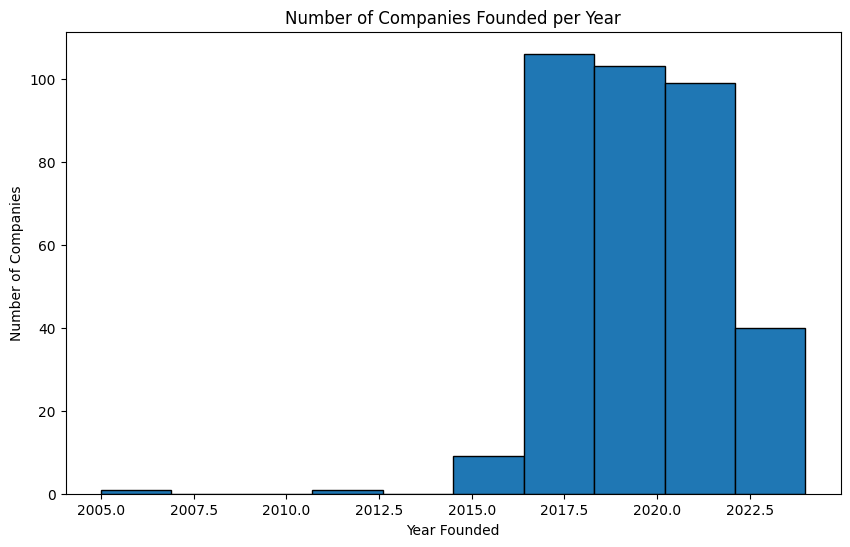

In [32]:
# @title Number of Companies Founded per Year

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['Founded'], bins=10, edgecolor='black')
plt.title('Number of Companies Founded per Year')
plt.xlabel('Year Founded')
_ = plt.ylabel('Number of Companies')

From 2017 and onwards it was the period when most companies on the dataset where founded.

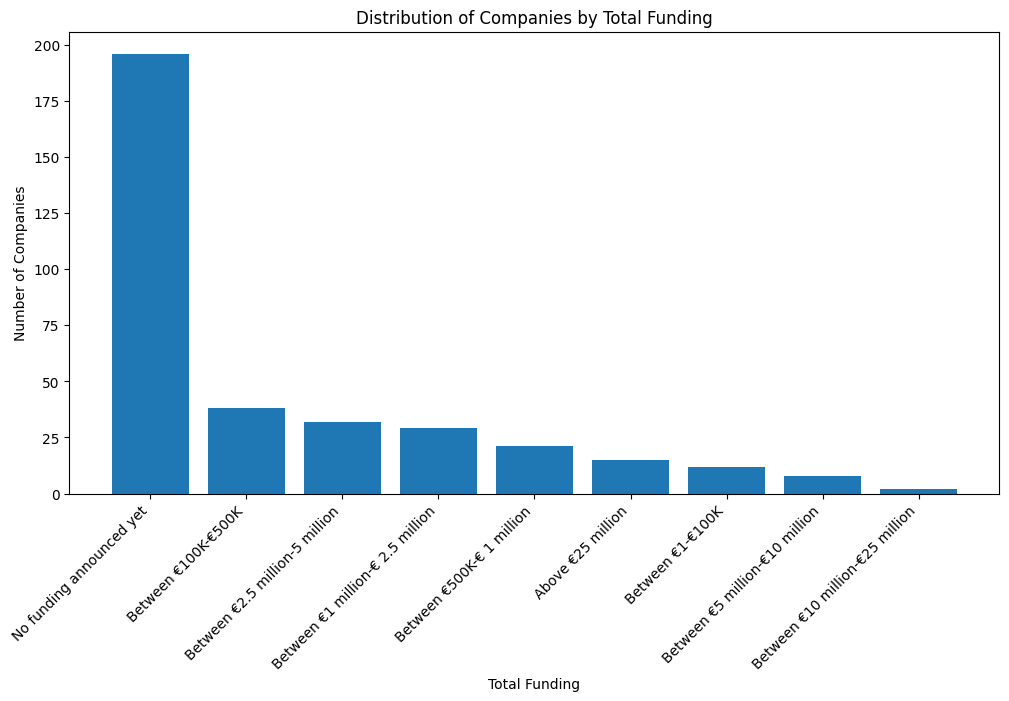

In [33]:
# @title Distribution of Companies by Total Funding

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
funding_counts = df['Total Funding'].value_counts()
plt.bar(funding_counts.index, funding_counts.values)
plt.title('Distribution of Companies by Total Funding')
plt.xlabel('Total Funding')
plt.ylabel('Number of Companies')
_ = plt.xticks(rotation=45, ha='right')

It can bee seen that there are startups with a high funding...

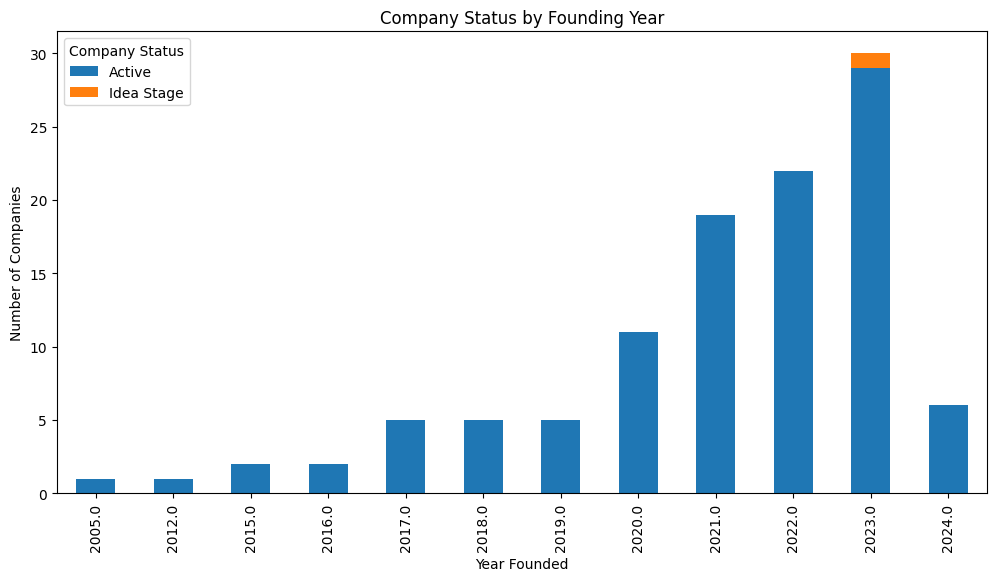

In [34]:
# @title Company Status by Founding Year

import matplotlib.pyplot as plt

company_status_by_year = df.groupby(['Founded', 'Company Status'])['Name'].count().unstack()

company_status_by_year.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Year Founded')
plt.ylabel('Number of Companies')
plt.title('Company Status by Founding Year')
_ = plt.legend(title='Company Status')

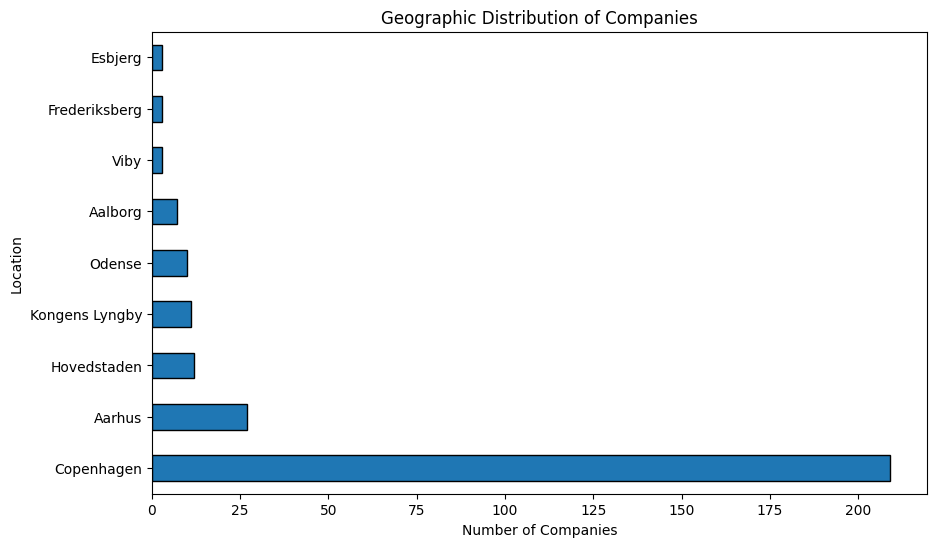

In [36]:
# @title Geographic Distribution of Companies

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df['Based in'].value_counts().head(9).plot(kind='barh', edgecolor='black')
plt.title('Geographic Distribution of Companies')
plt.xlabel('Number of Companies')
_ = plt.ylabel('Location')

#### Natural Language Processing

In this section NLP is going to be used to one step further in the data cleaning process. Inputation of the NaN values will be performed by using NLP techniques and models.

> Why use NLP?
> ne of the columns in the dataset is the *Business Description* of the company therefore, valuable information could be also extracted.

